In [2]:
import pandas as pd

train_df = pd.read_csv(r"C:\Users\Admin\Downloads\titanic\train.csv")
test_df = pd.read_csv(r"C:\Users\Admin\Downloads\titanic\test.csv")
gender_submission_df = pd.read_csv(r"C:\Users\Admin\Downloads\titanic\gender_submission.csv")


print("Training Data:")
print(train_df.head())


print("\nTest Data:")
print(test_df.head())


print("\nGender Submission Data:")
print(gender_submission_df.head())


Training Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [3]:

print("\nTraining Data Info:")
print(train_df.info())


print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())


print("\nSummary Statistics:")
print(train_df.describe(include='all'))



Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values in Training Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare         

In [4]:

train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


train_df.drop(columns=['Cabin', 'PassengerId', 'Ticket', 'Name'], inplace=True)


train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)


print("\nCleaned Training Data:")
print(train_df.head())



Cleaned Training Data:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500           0           1
1         1       1    1  38.0      1      0  71.2833           0           0
2         1       3    1  26.0      0      0   7.9250           0           1
3         1       1    1  35.0      1      0  53.1000           0           1
4         0       3    0  35.0      0      0   8.0500           0           1


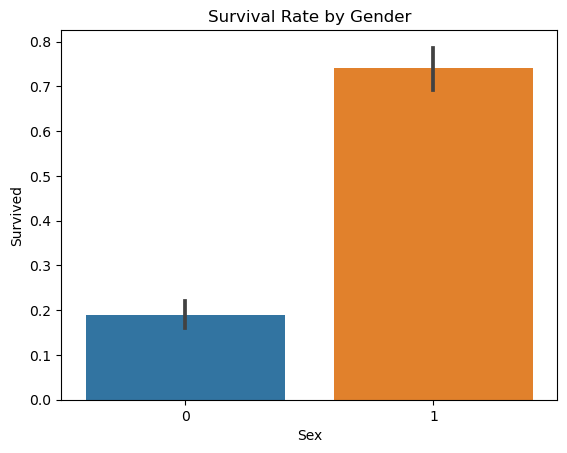

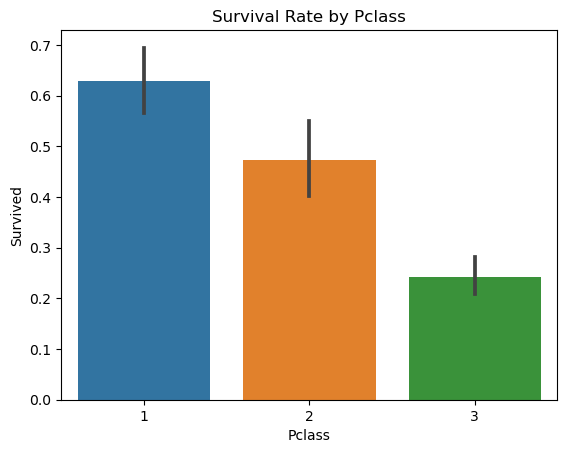

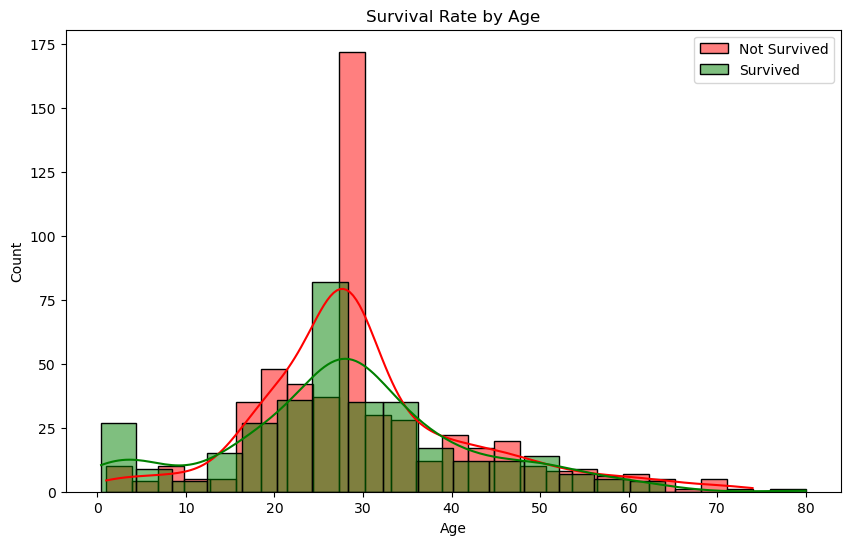

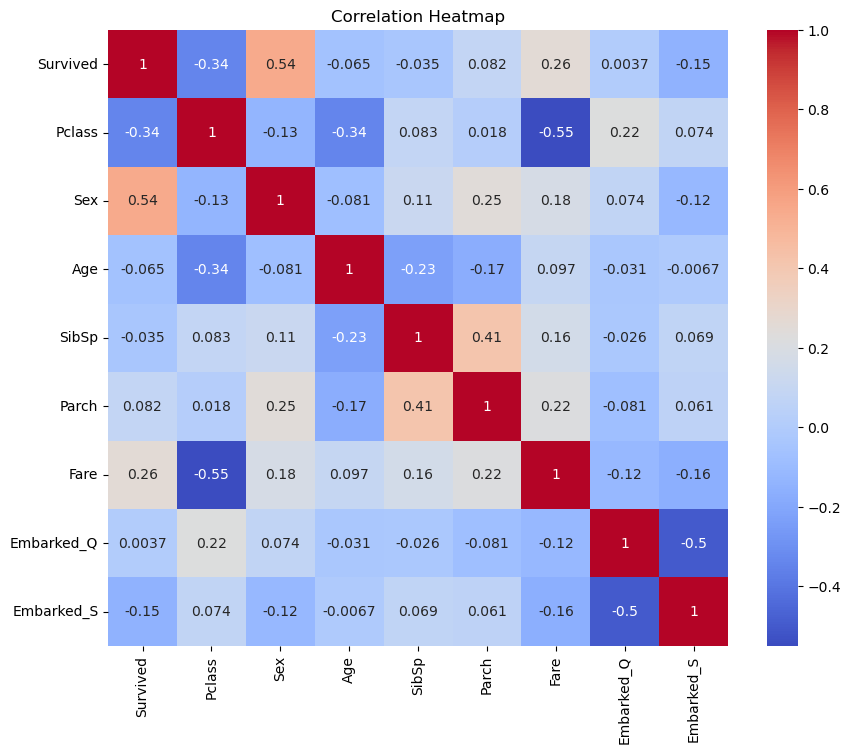

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()


sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pclass')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(train_df[train_df['Survived'] == 0]['Age'], color='red', kde=True, label='Not Survived')
sns.histplot(train_df[train_df['Survived'] == 1]['Age'], color='green', kde=True, label='Survived')
plt.title('Survival Rate by Age')
plt.legend()
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [6]:
# Separate features and target variable from training data
X_train = train_df.drop(columns='Survived')
y_train = train_df['Survived']

# For test data, we will apply the same transformations
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df.drop(columns=['Cabin', 'PassengerId', 'Ticket', 'Name'], inplace=True)
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

print("\nPrepared Training Features:")
print(X_train.head())
print("\nPrepared Test Features:")
print(test_df.head())



Prepared Training Features:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0       3    0  22.0      1      0   7.2500           0           1
1       1    1  38.0      1      0  71.2833           0           0
2       3    1  26.0      0      0   7.9250           0           1
3       1    1  35.0      1      0  53.1000           0           1
4       3    0  35.0      0      0   8.0500           0           1

Prepared Test Features:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0       3    0  34.5      0      0   7.8292           1           0
1       3    1  47.0      1      0   7.0000           0           1
2       2    0  62.0      0      0   9.6875           1           0
3       3    0  27.0      0      0   8.6625           0           1
4       3    1  22.0      1      1  12.2875           0           1
